In [1]:
%load_ext autoreload
%autoreload 2

from microsim.cosem import CosemDataset

In [2]:
dataset = CosemDataset.fetch('jrc_jurkat-1')
dataset


CosemDataset(
    name='jrc_jurkat-1',
    description='Immortalized T-Cells (Jurkat)',
    thumbnail_url='https://janelia-cosem-datasets.s3.amazonaws.com/jrc_jurkat-1/thumbnail.jpg',
    sample=CosemSample(
        name='44446c3486f77ee830604f980fda285f',
        description='Wild-type Jurkats. Clone E6-1 (ATCC TIB-152).',
        protocol='High pressure freezing, freeze-substitution resin embedding with 2% OsO₄ 0.1% UA 3% H₂O in acetone; resin embedding in Eponate 12.',
        type=['Cell culture'],
        subtype=['Jurkat'],
        organism=['Homo sapiens']
    ),
    image_acquisition=CosemImageAcquisition(
        name='Cryo_2017_FS96_Area1',
        start_date=datetime.datetime(2018, 8, 10, 0, 0),
        grid_axes=['x', 'y', 'z'],
        grid_spacing=[4.0, 4.0, 3.44],
        grid_dimensions=[40.0, 12.0, 29.0],
        grid_spacing_unit='nm',
        grid_dimensions_unit='µm'
    ),
    images=[
        CosemImage(
            name='nucleolus_pred',
            description=

In [10]:
[v for v in dataset.views if v.description][1].images


[
    CosemImage(
        name='golgi_seg',
        description='Golgi',
        url='s3://janelia-cosem-datasets/jrc_jurkat-1/jrc_jurkat-1.n5/labels/golgi_seg',
        format='n5',
        grid_scale=[3.44, 4.0, 4.0],
        grid_translation=[0.0, 0.0, 0.0],
        grid_dims=['z', 'y', 'x'],
        grid_units=['nm', 'nm', 'nm'],
        sample_type='label',
        content_type='segmentation'
    ),
    CosemImage(
        name='er_seg',
        description='Endoplasmic Reticulum',
        url='s3://janelia-cosem-datasets/jrc_jurkat-1/jrc_jurkat-1.n5/labels/er_seg',
        format='n5',
        grid_scale=[3.44, 4.0, 4.0],
        grid_translation=[0.0, 0.0, 0.0],
        grid_dims=['z', 'y', 'x'],
        grid_units=['nm', 'nm', 'nm'],
        sample_type='label',
        content_type='segmentation'
    ),
    CosemImage(
        name='endo_seg',
        description='Endosomal Network',
        url='s3://janelia-cosem-datasets/jrc_jurkat-1/jrc_jurkat-1.n5/labels/endo_seg',
     

In [3]:
dataset = datasets['jrc_jurkat-1']
print(dataset.em_layers)

[
    CosemImage(
        name='fibsem-uint8',
        description='FIB-SEM Data (compressed)',
        url='s3://janelia-cosem-datasets/jrc_jurkat-1/neuroglancer/em/fibsem-uint8.precomputed',
        format='precomputed',
        grid_scale=[3.44, -4.0, 4.0],
        grid_translation=[0.0, 12000.0, 0.0],
        grid_dims=['z', 'y', 'x'],
        grid_units=['nm', 'nm', 'nm'],
        sample_type='scalar',
        content_type='em'
    ),
    CosemImage(
        name='fibsem-uint16',
        description='FIB-SEM Data (uncompressed)',
        url='s3://janelia-cosem-datasets/jrc_jurkat-1/jrc_jurkat-1.n5/em/fibsem-uint16',
        format='n5',
        grid_scale=[3.44, 4.0, 4.0],
        grid_translation=[-5.0, -35.0, 0.0],
        grid_dims=['z', 'y', 'x'],
        grid_units=['nm', 'nm', 'nm'],
        sample_type='scalar',
        content_type='em'
    )
]

In [4]:
image = dataset.images[0]
image


CosemImage(
    name='nucleolus_pred',
    description='Nucleoulus',
    url='s3://janelia-cosem-datasets/jrc_jurkat-1/jrc_jurkat-1.n5/labels/nucleolus_pred',
    format='n5',
    grid_scale=[3.44, -4.0, 4.0],
    grid_translation=[0.0, 12000.0, 0.0],
    grid_dims=['z', 'y', 'x'],
    grid_units=['nm', 'nm', 'nm'],
    sample_type='scalar',
    content_type='prediction'
)

In [5]:
data = image.read()
data.s4.data


<xarray.DataArray 'data' (z: 535, y: 188, x: 625)> Size: 63MB
dask.array<array, shape=(535, 188, 625), dtype=uint8, chunksize=(535, 188, 625), chunktype=numpy.ndarray>
Coordinates:
  * z        (z) float64 4kB 25.8 80.84 135.9 ... 2.931e+04 2.936e+04 2.942e+04
  * y        (y) float64 2kB 30.0 94.0 158.0 ... 1.187e+04 1.193e+04 1.2e+04
  * x        (x) float64 5kB 30.0 94.0 158.0 ... 3.984e+04 3.99e+04 3.997e+04
Attributes:
    pixelResolution:  {'dimensions': [64.0, 64.0, 55.040000000000006], 'unit'...
    transform:        {'axes': ['z', 'y', 'x'], 'scale': [55.040000000000006,...

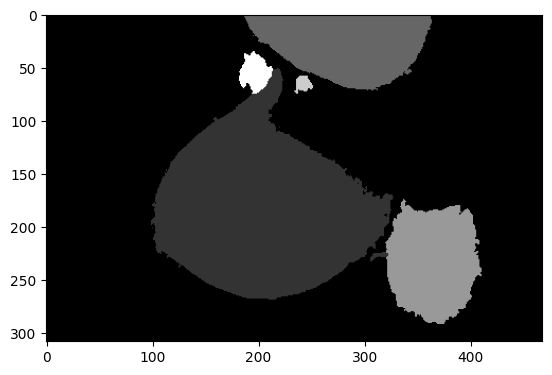

In [14]:
import matplotlib.pyplot as plt

plt.imshow(data.s4.data[40], cmap='gray')
